In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import statsmodels.api as sm
import pickle
import json
from typing import List,Dict,Tuple,Union
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy import stats
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestPower
from statsmodels.stats.multitest import multipletests


### Suspense Experiments

#### Compare 1st person and 3rd person models

In [170]:
#load slope data
with open('all_slopes_1st.json', 'r') as f:
    all_slopes_1st = json.load(f)

with open('all_slopes_3rd.json', 'r') as f:
    all_slopes_3rd = json.load(f)



Agency Group
1st    0.409279
3rd    0.614075
Name: Slope, dtype: float64 Agency Group
1st    0.102370
3rd    0.060415
Name: Slope, dtype: float64


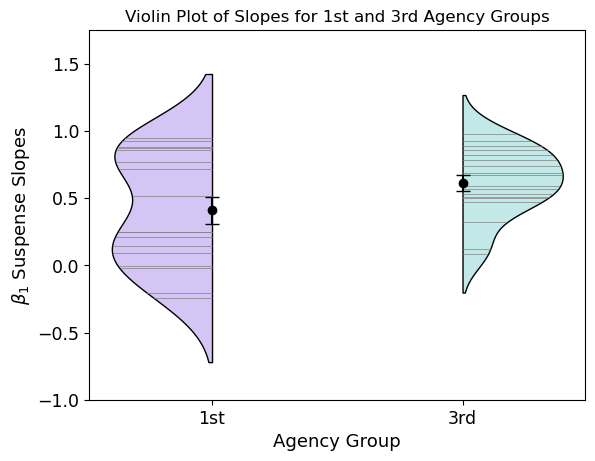

In [196]:
# Create a DataFrame
df = pd.DataFrame({'Slope': all_slopes_1st + all_slopes_3rd,
                   'Agency Group': ['1st'] * len(all_slopes_1st) + ['3rd'] * len(all_slopes_3rd)})


# Define pastel color palette
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9]]

# Create the violin plot
ax = sns.violinplot(x='Agency Group', y='Slope', data=df, saturation=0.7, hue='Agency Group', inner='stick', split=True, palette=[(*colors[0], 0.2), (*colors[1], 0.2)], linewidth=1)

# Remove the legend
ax.get_legend().remove()



# Manually set the edge color
for violin in ax.collections:
    violin.set_edgecolor('black')  # Replace 'black' with your desired edge color

# Calculate means
means = df.groupby('Agency Group')['Slope'].mean()

std_err = df.groupby('Agency Group')['Slope'].std() / np.sqrt(df.groupby('Agency Group')['Slope'].count())

print(means, std_err)

# Plot mean points
plt.scatter(x=[0, 1], y=means.values, c="k", marker="o", s=25, label='Mean')

# Plot standard error bars
plt.errorbar(x=[0, 1], y=means.values, yerr=std_err.values, fmt='o', c='k', linestyle='None', capsize=5)


# Add title and labels
plt.title('Violin Plot of Slopes for 1st and 3rd Agency Groups')
plt.xlabel('Agency Group', fontsize = '13')
plt.ylabel(r'$\beta_1$ Suspense Slopes', fontsize = '13')
plt.xticks(fontsize = '12.5')
plt.yticks(fontsize = '12.5')
plt.ylim(-1, 1.75)

# Show the plot
plt.show()

In [205]:
test = all_slopes_3rd[:17]

In [211]:

# Perform one-sample t-test against zero for all_slopes_1st
t_statistic_1st, p_value_1st = ttest_1samp(all_slopes_1st, 0)
print("One-sample t-test for all_slopes_1st against 0")
print("T-statistic:", t_statistic_1st)
print("P-value:", p_value_1st)

# Perform one-sample t-test against zero for all_slopes_3rd
t_statistic_3rd, p_value_3rd = ttest_1samp(all_slopes_3rd, 0)
print("One-sample t-test for all_slopes_3rd against 0")
print("T-statistic:", t_statistic_3rd)
print("P-value:", p_value_3rd)

# Perform two-sample t-test between 1st and 3rd slopes
t_statistic, p_value = ttest_ind(all_slopes_1st, all_slopes_3rd)
print("\nTwo-sample t-test between all_slopes_1st and all_slopes_3rd")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05

if p_value_1st < alpha:
    print("Reject the null hypothesis: There is a significant difference between the slopes and the null.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between and the null.")


if p_value_3rd < alpha:
    print("Reject the null hypothesis: There is a significant difference between the slopes and the null.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between and the null.")


if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the slopes and the two distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two distributions.")

One-sample t-test for all_slopes_1st against 0
T-statistic: 3.9980371019805236
P-value: 0.0010362926802473258
One-sample t-test for all_slopes_3rd against 0
T-statistic: 10.16436417222953
P-value: 1.2185373504387809e-08

Two-sample t-test between all_slopes_1st and all_slopes_3rd
T-statistic: -1.7464548385004748
P-value: 0.09003559980947351
Reject the null hypothesis: There is a significant difference between the slopes and the null.
Reject the null hypothesis: There is a significant difference between the slopes and the null.
Fail to reject the null hypothesis: There is no significant difference between the two distributions.


### Satisfaction Experiments Condition 1

In [174]:
#load models

#slopes for 1st person

with open('all_slopes_susp_1st.json', 'r') as f:
    all_slopes_susp_1st = json.load(f)

with open('all_slopes_outcome_1st.json', 'r') as f:
    all_slopes_outcome_1st = json.load(f)


with open('all_slopes_int_1st.json', 'r') as f:
    all_slopes_int_1st = json.load(f)


#slopes for 3rd person
with open('all_slopes_susp_3rd.json', 'r') as f:
    all_slopes_susp_3rd = json.load(f)

with open('all_slopes_outcome_3rd.json', 'r') as f:
    all_slopes_outcome_3rd = json.load(f)


with open('all_slopes_int_3rd.json', 'r') as f:
    all_slopes_int_3rd = json.load(f)




#Slopes divided by outcome


with open('all_slopes_susp_1st_win.json', 'r') as f:
    all_slopes_susp_1st_win = json.load(f)


with open('all_slopes_susp_1st_lose.json', 'r') as f:
    all_slopes_susp_1st_lose = json.load(f)


with open('all_slopes_susp_3rd_win.json', 'r') as f:
    all_slopes_susp_3rd_win = json.load(f)


with open('all_slopes_susp_3rd_lose.json', 'r') as f:
    all_slopes_susp_3rd_lose = json.load(f)

Means Agency Group
1st    0.549855
3rd    0.456552
Name: Suspense, dtype: float64
Std.err Agency Group
1st    0.241017
3rd    0.172239
Name: Suspense, dtype: float64
Means Agency Group
1st    1.006404
3rd    0.978802
Name: Outcome, dtype: float64
Std.err Agency Group
1st    0.187013
3rd    0.200066
Name: Outcome, dtype: float64
Means Agency Group
1st   -0.735883
3rd   -0.071735
Name: Interaction, dtype: float64
Std.err Agency Group
1st    0.331221
3rd    0.155749
Name: Interaction, dtype: float64


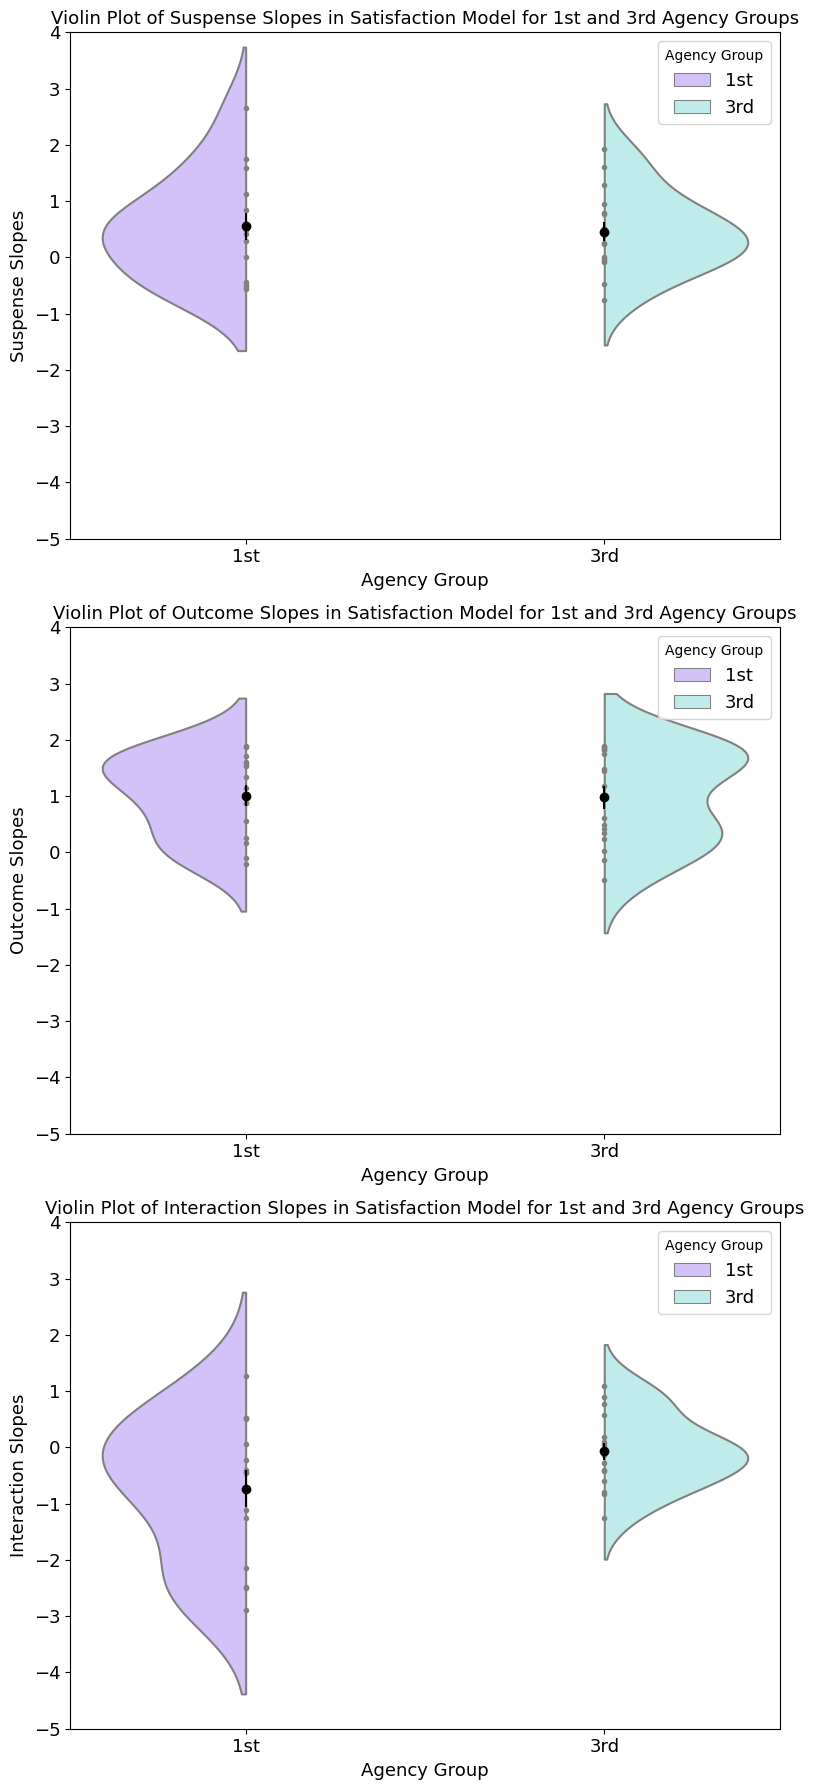

In [175]:
# Create DataFrames for each variable
df_suspense = pd.DataFrame({
    'Suspense': all_slopes_susp_1st + all_slopes_susp_3rd,
    'Agency Group': ['1st'] * len(all_slopes_susp_1st) + ['3rd'] * len(all_slopes_susp_3rd)
})

df_outcome = pd.DataFrame({
    'Outcome': all_slopes_outcome_1st + all_slopes_outcome_3rd,
    'Agency Group': ['1st'] * len(all_slopes_outcome_1st) + ['3rd'] * len(all_slopes_outcome_3rd)
})

df_int = pd.DataFrame({
    'Interaction': all_slopes_int_1st + all_slopes_int_3rd,
    'Agency Group': ['1st'] * len(all_slopes_int_1st) + ['3rd'] * len(all_slopes_int_3rd)
})

# Define pastel color palette
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9]]

# Create the violin plots for all variables in one graph
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Plot each variable
for ax, df, variable, ylabel in zip(axes, [df_suspense, df_outcome, df_int], ['Suspense', 'Outcome', 'Interaction'], ['Suspense Slopes', 'Outcome Slopes', 'Interaction Slopes']):
    sns.violinplot(x='Agency Group', y=variable, data=df, saturation=0.8, hue='Agency Group', inner='point', split=True, palette=colors, ax=ax)
    ax.set_title(f'Violin Plot of {variable} Slopes in Satisfaction Model for 1st and 3rd Agency Groups', fontsize=13)
    ax.set_xlabel('Agency Group', fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_ylim(-5, 4)  # Set y-axis limit
    ax.legend(title='Agency Group', fontsize=13)
    
    # Calculate means and standard errors
    means = df.groupby('Agency Group')[variable].mean()
    std_err = df.groupby('Agency Group')[variable].std() / np.sqrt(df.groupby('Agency Group')[variable].count())

    print('Means',  means)
    print('Std.err',  std_err)
    
    # Plot mean points
    for i, group in enumerate(['1st', '3rd']):
        ax.errorbar(x=i, y=means[group], yerr=std_err[group], fmt='o', color='black', label=f'Mean {group}')


        
        # Set tick label font size
        ax.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.show()

In [176]:

# Perform one-sample t-test against zero for each variable
for variable, df in {'Suspense': df_suspense, 'Outcome': df_outcome, 'Interaction': df_int}.items():
    for group in ['1st', '3rd']:
        group_data = df[df['Agency Group'] == group][variable]
        t_stat, p_val = ttest_1samp(group_data, 0)
        df_degree_freedom = len(group_data) - 1
        print(f"One-sample t-test for {variable} in {group} Agency Group: t-statistic={t_stat:.2f}, df={df_degree_freedom}, p-value={p_val:.2e}")

# Perform two-sample t-test between 1st and 3rd Agency Groups for each variable
for variable, df in {'Suspense': df_suspense, 'Outcome': df_outcome, 'Interaction': df_int}.items():
    group_1st = df[df['Agency Group'] == '1st'][variable]
    group_3rd = df[df['Agency Group'] == '3rd'][variable]
    
    # Calculate delta of the means
    delta_means = group_1st.mean() - group_3rd.mean()
    
    t_stat, p_val = ttest_ind(group_1st, group_3rd)
    df_degree_freedom = len(group_1st) + len(group_3rd) - 2
    print(f"Two-sample t-test for {variable} between 1st and 3rd Agency Groups: t-statistic={t_stat:.2f}, df={df_degree_freedom}, p-value={p_val:.2e}, delta_means={delta_means:.2f}")

One-sample t-test for Suspense in 1st Agency Group: t-statistic=2.28, df=14, p-value=3.87e-02
One-sample t-test for Suspense in 3rd Agency Group: t-statistic=2.65, df=16, p-value=1.74e-02
One-sample t-test for Outcome in 1st Agency Group: t-statistic=5.38, df=14, p-value=9.68e-05
One-sample t-test for Outcome in 3rd Agency Group: t-statistic=4.89, df=16, p-value=1.63e-04
One-sample t-test for Interaction in 1st Agency Group: t-statistic=-2.22, df=14, p-value=4.33e-02
One-sample t-test for Interaction in 3rd Agency Group: t-statistic=-0.46, df=16, p-value=6.51e-01
Two-sample t-test for Suspense between 1st and 3rd Agency Groups: t-statistic=0.32, df=30, p-value=7.51e-01, delta_means=0.09
Two-sample t-test for Outcome between 1st and 3rd Agency Groups: t-statistic=0.10, df=30, p-value=9.21e-01, delta_means=0.03
Two-sample t-test for Interaction between 1st and 3rd Agency Groups: t-statistic=-1.89, df=30, p-value=6.90e-02, delta_means=-0.66


means Agency Group
1st   -0.203274
3rd    0.384817
Name: Suspense, dtype: float64
std err Agency Group
1st    0.193057
3rd    0.166784
Name: Suspense, dtype: float64
means Agency Group
1st   -0.331724
3rd    0.389193
Name: Suspense, dtype: float64
std err Agency Group
1st    0.311055
3rd    0.162833
Name: Suspense, dtype: float64


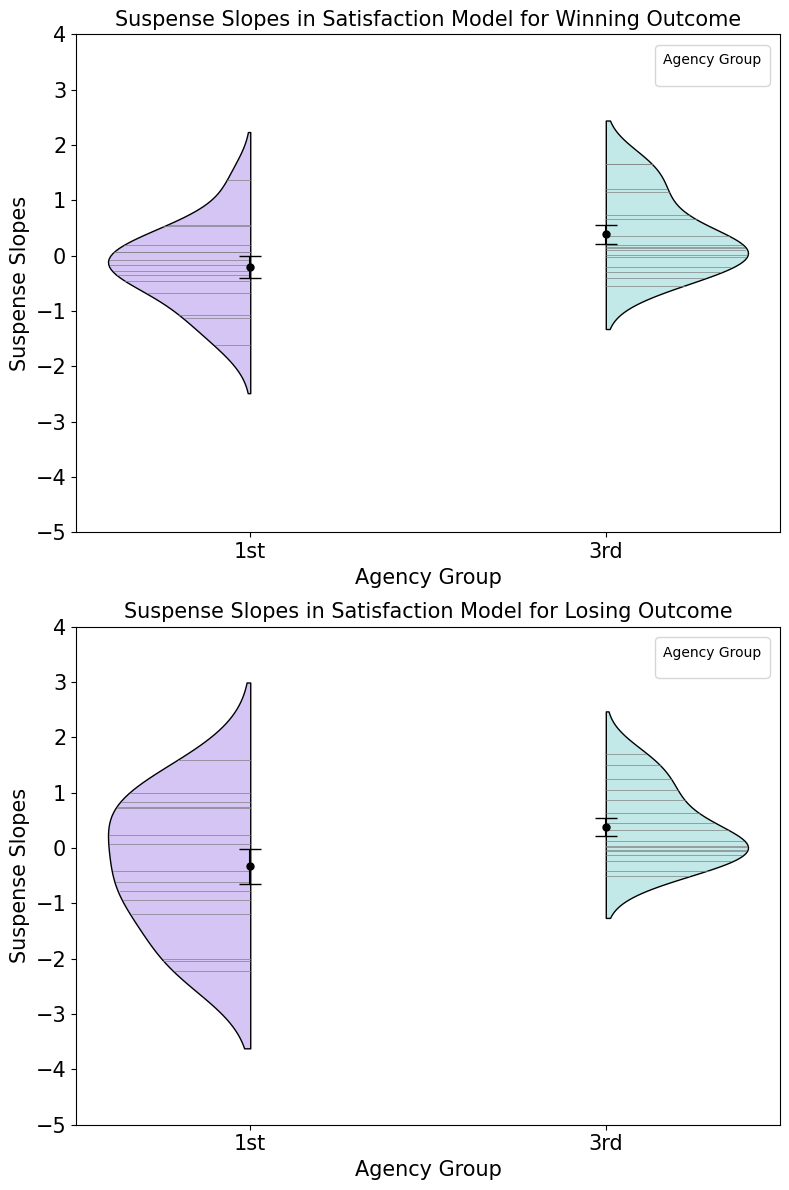

In [230]:
# Create DataFrames for each variable for outcome analysis
df_suspense_win = pd.DataFrame({
    'Suspense': np.concatenate([all_slopes_susp_1st_win, all_slopes_susp_3rd_win]),
    'Agency Group': ['1st'] * len(all_slopes_susp_1st_win) + ['3rd'] * len(all_slopes_susp_3rd_win)
})

df_suspense_lose = pd.DataFrame({
    'Suspense': np.concatenate([all_slopes_susp_1st_lose, all_slopes_susp_3rd_lose]),
    'Agency Group': ['1st'] * len(all_slopes_susp_1st_lose) + ['3rd'] * len(all_slopes_susp_3rd_lose)
})

# Define pastel color palette with transparency
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9]]
colors_with_alpha = [(color[0], color[1], color[2], 0.8) for color in colors]  # Adjust transparency as needed

# Create the violin plots for all variables in one graph
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# List of DataFrames and titles
dataframes = [df_suspense_win, df_suspense_lose]
titles = ['Suspense Slopes in Satisfaction Model for Winning Outcome', 'Suspense Slopes in Satisfaction Model for Losing Outcome']

# Plot each variable
for ax, df, title in zip(axes, dataframes, titles):
    sns.violinplot(x='Agency Group', y='Suspense', data=df, saturation=0.7, hue='Agency Group', inner='stick', split=True, palette=colors_with_alpha, ax=ax, linewidth=1)

    # Manually set the edge color
    for violin in ax.collections:
        violin.set_edgecolor('black')

    # Overlay stripplot to add inner points with a larger size

    # Remove the legend from the stripplot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], labels[2:], title='Agency Group', fontsize=15)

    # Calculate means and standard errors
    means = df.groupby('Agency Group')['Suspense'].mean()
    std_err = df.groupby('Agency Group')['Suspense'].std() / np.sqrt(df.groupby('Agency Group')['Suspense'].count())

    print('means',means)
    print('std err',std_err)

    # Plot mean points and standard error bars
    for i, group in enumerate(['1st', '3rd']):
        ax.errorbar(x=i, y=means[group], yerr=std_err[group], fmt='o', color='black', markersize=5, capsize=8, label=f'Mean {group}')
   

    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Agency Group', fontsize=15)
    ax.set_ylabel('Suspense Slopes', fontsize=15)
    ax.set_ylim(-5, 4)  # Set y-axis limit
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

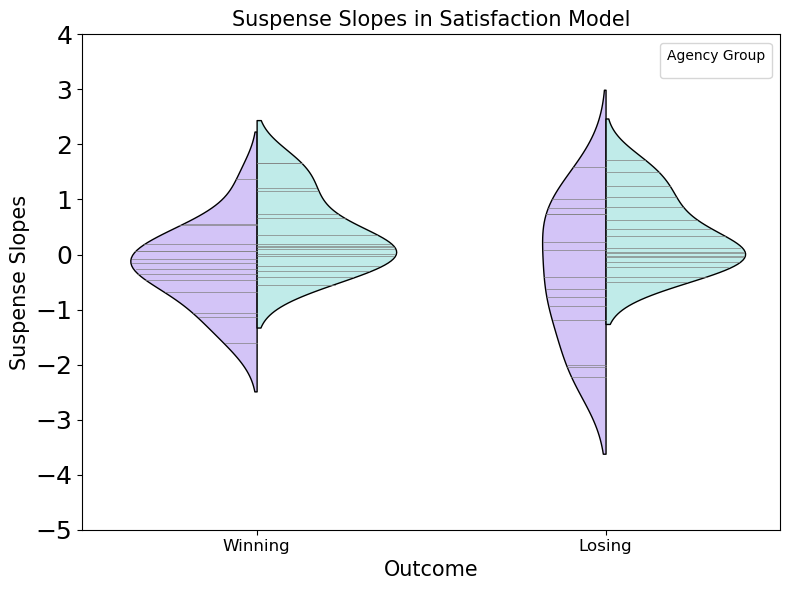

In [229]:
#combine both outcomes in one plot

# Create DataFrames for both winning and losing outcomes
df_win = pd.DataFrame({
    'Suspense': np.concatenate([all_slopes_susp_1st_win, all_slopes_susp_3rd_win]),
    'Outcome': ['Winning'] * (len(all_slopes_susp_1st_win) + len(all_slopes_susp_3rd_win)),
    'Agency Group': ['1st'] * len(all_slopes_susp_1st_win) + ['3rd'] * len(all_slopes_susp_3rd_win)
})

df_lose = pd.DataFrame({
    'Suspense': np.concatenate([all_slopes_susp_1st_lose, all_slopes_susp_3rd_lose]),
    'Outcome': ['Losing'] * (len(all_slopes_susp_1st_lose) + len(all_slopes_susp_3rd_lose)),
    'Agency Group': ['1st'] * len(all_slopes_susp_1st_lose) + ['3rd'] * len(all_slopes_susp_3rd_lose)
})

# Concatenate both DataFrames
df_combined = pd.concat([df_win, df_lose])

# Define pastel color palette with transparency
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9]]
colors_with_alpha = [(color[0], color[1], color[2], 0.8) for color in colors]  # Adjust transparency as needed

# Create the violin plots for both winning and losing outcomes
plt.figure(figsize=(8, 6))

sns.violinplot(x='Outcome', y='Suspense', hue='Agency Group', data=df_combined, split=True,
               palette=colors_with_alpha, inner='stick', linewidth=1)

# Manually set the edge color
for violin in plt.gca().collections:
    violin.set_edgecolor('black')

# Overlay stripplot to add inner points with a larger size

# Remove the legend from the stripplot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[2:], labels[2:], title='Agency Group', fontsize=12)

# Calculate means and standard errors
means = df_combined.groupby(['Outcome', 'Agency Group'])['Suspense'].mean()
std_err = df_combined.groupby(['Outcome', 'Agency Group'])['Suspense'].std() / np.sqrt(df_combined.groupby(['Outcome', 'Agency Group'])['Suspense'].count())

# Plot mean points and standard error bars
#for i, outcome in enumerate(['Winning', 'Losing']):
   # for j, group in enumerate(['1st', '3rd']):
        #plt.errorbar(x=i + j * 0.2, y=means[outcome, group], yerr=std_err[outcome, group],
                     #fmt='o', color='black', markersize=5, capsize=8, label=f'Mean {group} {outcome}')

plt.title('Suspense Slopes in Satisfaction Model', fontsize=15)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Suspense Slopes', fontsize=15)
plt.ylim(-5, 4)  # Set y-axis limit
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

In [ ]:

# Perform one-sample t-test for each group against 0
for label, df in [('win', df_suspense_win), ('lose', df_suspense_lose)]:
    for group in ['1st', '3rd']:
        group_data = df[df['Agency Group'] == group]['Suspense']
        t_stat, p_val = ttest_1samp(group_data, 0)
        df_degree_freedom = len(group_data) - 1
        print(f"One-sample t-test for Suspense in {group} Agency Group ({label} outcome): t-statistic={t_stat:.2f}, df={df_degree_freedom}, p-value={p_val:.2e}")

# Perform two-sample t-test between 1st and 3rd Agency Groups for each variable
for label, df in [('win', df_suspense_win), ('lose', df_suspense_lose)]:
    group_1st = df[df['Agency Group'] == '1st']['Suspense']
    group_3rd = df[df['Agency Group'] == '3rd']['Suspense']
    
    # Calculate delta of the means
    delta_means = group_1st.mean() - group_3rd.mean()
    
    t_stat, p_val = ttest_ind(group_1st, group_3rd)
    df_degree_freedom = len(group_1st) + len(group_3rd) - 2
    print(f"Two-sample t-test for Suspense between 1st and 3rd Agency Groups ({label} outcome): t-statistic={t_stat:.2f}, df={df_degree_freedom}, p-value={p_val:.2e}, delta_means={delta_means:.2f}")

One-sample t-test for Suspense in 1st Agency Group (win outcome): t-statistic=-1.05, df=14, p-value=3.10e-01
One-sample t-test for Suspense in 3rd Agency Group (win outcome): t-statistic=2.31, df=16, p-value=3.47e-02
One-sample t-test for Suspense in 1st Agency Group (lose outcome): t-statistic=-1.07, df=14, p-value=3.04e-01
One-sample t-test for Suspense in 3rd Agency Group (lose outcome): t-statistic=2.39, df=16, p-value=2.95e-02
Two-sample t-test for Suspense between 1st and 3rd Agency Groups (win outcome): t-statistic=-2.32, df=30, p-value=2.75e-02, delta_means=-0.59
Two-sample t-test for Suspense between 1st and 3rd Agency Groups (lose outcome): t-statistic=-2.12, df=30, p-value=4.20e-02, delta_means=-0.72


### Condition 2

In [ ]:
#Count per starting point

with open('starting_point_minus_10_slopes_1st.json', 'r') as f:
    starting_point_minus_10_slopes_1st = json.load(f)

with open('starting_point_0_slopes_1st.json', 'r') as f:
    starting_point_0_slopes_1st = json.load(f)

with open('starting_point_10_slopes_1st.json', 'r') as f:
    starting_point_10_slopes_1st = json.load(f)

with open('starting_point_minus_10_slopes_3rd.json', 'r') as f:
    starting_point_minus_10_slopes_3rd = json.load(f)

with open('starting_point_0_slopes_3rd.json', 'r') as f:
    starting_point_0_slopes_3rd = json.load(f)

with open('starting_point_10_slopes_3rd.json', 'r') as f:
    starting_point_10_slopes_3rd = json.load(f)



#EV per starting point

with open('starting_point_minus_10_slopes_1st_ev.json', 'r') as f:
    starting_point_minus_10_slopes_1st_ev = json.load(f)

with open('starting_point_0_slopes_1st_ev.json', 'r') as f:
    starting_point_0_slopes_1st_ev = json.load(f)

with open('starting_point_10_slopes_1st_ev.json', 'r') as f:
    starting_point_10_slopes_1st_ev = json.load(f)

with open('starting_point_minus_10_slopes_3rd_ev.json', 'r') as f:
    starting_point_minus_10_slopes_3rd_ev = json.load(f)

with open('starting_point_0_slopes_3rd_ev.json', 'r') as f:
    starting_point_0_slopes_3rd_ev = json.load(f)

with open('starting_point_10_slopes_3rd_ev.json', 'r') as f:
    starting_point_10_slopes_3rd_ev = json.load(f)


#Var per starting point

with open('starting_point_minus_10_slopes_1st_var.json', 'r') as f:
    starting_point_minus_10_slopes_1st_var = json.load(f)

with open('starting_point_0_slopes_1st_var.json', 'r') as f:
    starting_point_0_slopes_1st_var = json.load(f)

with open('starting_point_10_slopes_1st_var.json', 'r') as f:
    starting_point_10_slopes_1st_var = json.load(f)

with open('starting_point_minus_10_slopes_3rd_var.json', 'r') as f:
    starting_point_minus_10_slopes_3rd_var = json.load(f)

with open('starting_point_0_slopes_3rd_var.json', 'r') as f:
    starting_point_0_slopes_3rd_var = json.load(f)

with open('starting_point_10_slopes_3rd_var.json', 'r') as f:
    starting_point_10_slopes_3rd_var = json.load(f)



#Satisfaction as a function of suspsense

with open('satisfaction_slopes_cond_2_1st.json', 'r') as f:
    satisfaction_slopes_cond_2_1st = json.load(f)


with open('satisfaction_slopes_cond_2_3rd.json', 'r') as f:
    satisfaction_slopes_cond_2_3rd = json.load(f)



#Satisfaction as a function of suspsense separated by starting point


with open('satisfaction_slopes_cond_2_minus_10_1st.json', 'r') as f:
    satisfaction_slopes_cond_2_minus_10_1st = json.load(f)


with open('satisfaction_slopes_cond_2_0_1st.json', 'r') as f:
    satisfaction_slopes_cond_2_0_1st = json.load(f)

with open('satisfaction_slopes_cond_2_plus_10_1st.json', 'r') as f:
    satisfaction_slopes_cond_2_10_1st = json.load(f)


with open('satisfaction_slopes_cond_2_minus_10_3rd.json', 'r') as f:
    satisfaction_slopes_cond_2_minus_10_3rd = json.load(f)


with open('satisfaction_slopes_cond_2_0_3rd.json', 'r') as f:
    satisfaction_slopes_cond_2_0_3rd = json.load(f)

with open('satisfaction_slopes_cond_2_plus_10_3rd.json', 'r') as f:
    satisfaction_slopes_cond_2_10_3rd = json.load(f)


In [ ]:
def create_violin_plots(starting_point_minus_10_slopes_1st, starting_point_minus_10_slopes_3rd,
                                             starting_point_0_slopes_1st, starting_point_0_slopes_3rd,
                                             starting_point_10_slopes_1st, starting_point_10_slopes_3rd, title):
    """
    Create violin plots for slope values at different starting points for 1st and 3rd agency groups,
    perform statistical tests, and apply FDR correction.

    Parameters:
    - starting_point_minus_10_slopes_1st: List of slopes for starting point -10 for 1st agency group.
    - starting_point_minus_10_slopes_3rd: List of slopes for starting point -10 for 3rd agency group.
    - starting_point_0_slopes_1st: List of slopes for starting point 0 for 1st agency group.
    - starting_point_0_slopes_3rd: List of slopes for starting point 0 for 3rd agency group.
    - starting_point_10_slopes_1st: List of slopes for starting point 10 for 1st agency group.
    - starting_point_10_slopes_3rd: List of slopes for starting point 10 for 3rd agency group.
    """
    
    # Create DataFrames for each variable
    df_starting_point_minus_10 = pd.DataFrame({
        'Starting Point -10': starting_point_minus_10_slopes_1st + starting_point_minus_10_slopes_3rd,
        'Agency Group': ['1st'] * len(starting_point_minus_10_slopes_1st) + ['3rd'] * len(starting_point_minus_10_slopes_3rd)
    })

    df_starting_point_0 = pd.DataFrame({
        'Starting Point 0': starting_point_0_slopes_1st + starting_point_0_slopes_3rd,
        'Agency Group': ['1st'] * len(starting_point_0_slopes_1st) + ['3rd'] * len(starting_point_0_slopes_3rd)
    })

    df_starting_point_10 = pd.DataFrame({
        'Starting Point 10': starting_point_10_slopes_1st + starting_point_10_slopes_3rd,
        'Agency Group': ['1st'] * len(starting_point_10_slopes_1st) + ['3rd'] * len(starting_point_10_slopes_3rd)
    })

    # Define pastel color palette
    pastel_palette = sns.color_palette("pastel")
    colors = [pastel_palette[4], pastel_palette[9], pastel_palette[7]]

    # Create the violin plots for all variables in one graph
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5)
# Plot each variable
    for ax, df, variable, ylabel in zip(axes, [df_starting_point_minus_10, df_starting_point_0, df_starting_point_10], 
                                        ['Starting Point -10', 'Starting Point 0', 'Starting Point 10'], 
                                        ['Starting Point -10 Slopes', 'Starting Point 0 Slopes', 'Starting Point 10 Slopes']):
        sns.violinplot(x='Agency Group', y=variable, data=df, saturation=0.8, hue='Agency Group', inner='point', split=True, palette=colors, ax=ax)
        ax.set_title(f'{variable} Slopes in {title} Model for 1st and 3rd Agency Groups', fontsize=13)
        ax.set_xlabel('Agency Group', fontsize=13)
        ax.set_ylabel(ylabel, fontsize=13)
        ax.set_ylim(-12, 10)  # Set y-axis limit
        ax.legend(title='Agency Group', fontsize=13)

        # Calculate means and standard errors
        means = df.groupby('Agency Group')[variable].mean()
        std_err = df.groupby('Agency Group')[variable].std() / np.sqrt(df.groupby('Agency Group')[variable].count())

        print('means', means)
        print('std err', std_err)

        # Plot mean points
        for i, group in enumerate(['1st', '3rd']):
            ax.errorbar(x=i, y=means[group], yerr=std_err[group], fmt='o', color='black', label=f'Mean {group}')
            ax.tick_params(axis='both', which='major', labelsize=13)

    plt.tight_layout()
    plt.show()

    # Collect p-values for FDR correction
    p_values = []
    tests = []

    # Perform one-sample t-test against zero for each variable
    for variable, df in {'Starting Point -10': df_starting_point_minus_10, 'Starting Point 0': df_starting_point_0, 'Starting Point 10': df_starting_point_10}.items():
        for group in ['1st', '3rd']:
            group_data = df[df['Agency Group'] == group][variable]
            t_stat, p_val = ttest_1samp(group_data, 0)
            p_values.append(p_val)
            tests.append(f"One-sample t-test for {variable} in {group} Agency Group: t-statistic={t_stat}, p-value={p_val}")

    # Perform two-sample t-test between 1st and 3rd Agency Groups for each variable
    for variable, df in {'Starting Point -10': df_starting_point_minus_10, 'Starting Point 0': df_starting_point_0, 'Starting Point 10': df_starting_point_10}.items():
        group_1st = df[df['Agency Group'] == '1st'][variable]
        group_3rd = df[df['Agency Group'] == '3rd'][variable]
        t_stat, p_val = ttest_ind(group_1st, group_3rd)
        p_values.append(p_val)
        tests.append(f"Two-sample t-test for {variable} between 1st and 3rd Agency Groups: t-statistic={t_stat}, p-value={p_val}")

    # Perform t-tests within each agency group for different starting points
    df_1st = pd.DataFrame({
        'Starting Point -10': starting_point_minus_10_slopes_1st,
        'Starting Point 0': starting_point_0_slopes_1st,
        'Starting Point 10': starting_point_10_slopes_1st,
    })

    df_3rd = pd.DataFrame({
        'Starting Point -10': starting_point_minus_10_slopes_3rd,
        'Starting Point 0': starting_point_0_slopes_3rd,
        'Starting Point 10': starting_point_10_slopes_3rd,
    })

    for df, agency in zip([df_1st, df_3rd], ['1st', '3rd']):
        for (var1, var2) in [('Starting Point 0', 'Starting Point 10'), 
                             ('Starting Point 10', 'Starting Point -10'), 
                             ('Starting Point 0', 'Starting Point -10')]:
            t_stat, p_val = ttest_ind(df[var1], df[var2])
            p_values.append(p_val)
            tests.append(f"Two-sample t-test for {var1} vs {var2} in {agency} Agency Group: t-statistic={t_stat}, p-value={p_val}")

    # Apply FDR correction
    reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
    
    # Print results with FDR correction
    for test, p_val, p_val_corrected in zip(tests, p_values, pvals_corrected):
        print(f"{test}, corrected p-value={p_val_corrected}")

        #Correct for 12 tests

means Agency Group
1st    0.700980
3rd    0.066391
Name: Starting Point -10, dtype: float64
std err Agency Group
1st    0.400560
3rd    0.123685
Name: Starting Point -10, dtype: float64
means Agency Group
1st   -0.299020
3rd   -0.261614
Name: Starting Point 0, dtype: float64
std err Agency Group
1st    0.383220
3rd    0.134489
Name: Starting Point 0, dtype: float64
means Agency Group
1st   -1.679412
3rd   -0.348120
Name: Starting Point 10, dtype: float64
std err Agency Group
1st    0.374519
3rd    0.173413
Name: Starting Point 10, dtype: float64


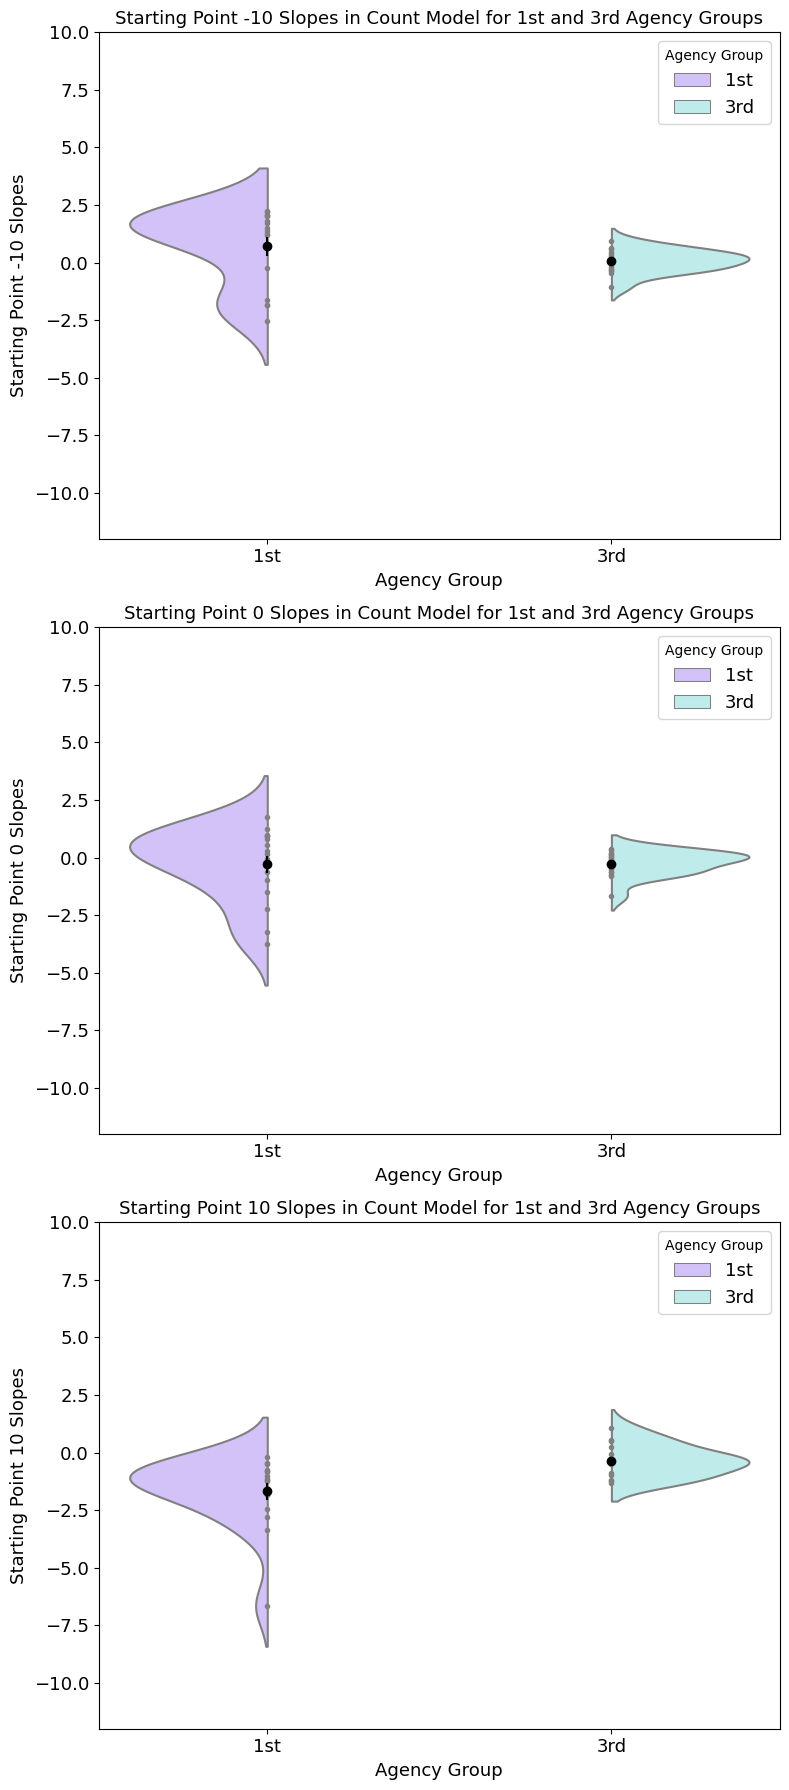

One-sample t-test for Starting Point -10 in 1st Agency Group: t-statistic=1.7500012435676344, p-value=0.0992677068777086, corrected p-value=0.1489015603165629
One-sample t-test for Starting Point -10 in 3rd Agency Group: t-statistic=0.5367789715193415, p-value=0.5992922947489017, corrected p-value=0.6914911093256557
One-sample t-test for Starting Point 0 in 1st Agency Group: t-statistic=-0.7802818152476093, p-value=0.4466155440703793, corrected p-value=0.558269430087974
One-sample t-test for Starting Point 0 in 3rd Agency Group: t-statistic=-1.9452419678151411, p-value=0.07073590091962799, corrected p-value=0.13784855287543346
One-sample t-test for Starting Point 10 in 1st Agency Group: t-statistic=-4.48418180040892, p-value=0.0003756319540188996, corrected p-value=0.002817239655141747
One-sample t-test for Starting Point 10 in 3rd Agency Group: t-statistic=-2.007464355952749, p-value=0.0630666488302665, corrected p-value=0.13784855287543346
Two-sample t-test for Starting Point -10 bet

In [ ]:
create_violin_plots(
    starting_point_minus_10_slopes_1st, starting_point_minus_10_slopes_3rd,
    starting_point_0_slopes_1st, starting_point_0_slopes_3rd,
    starting_point_10_slopes_1st, starting_point_10_slopes_3rd, 'Count'
)


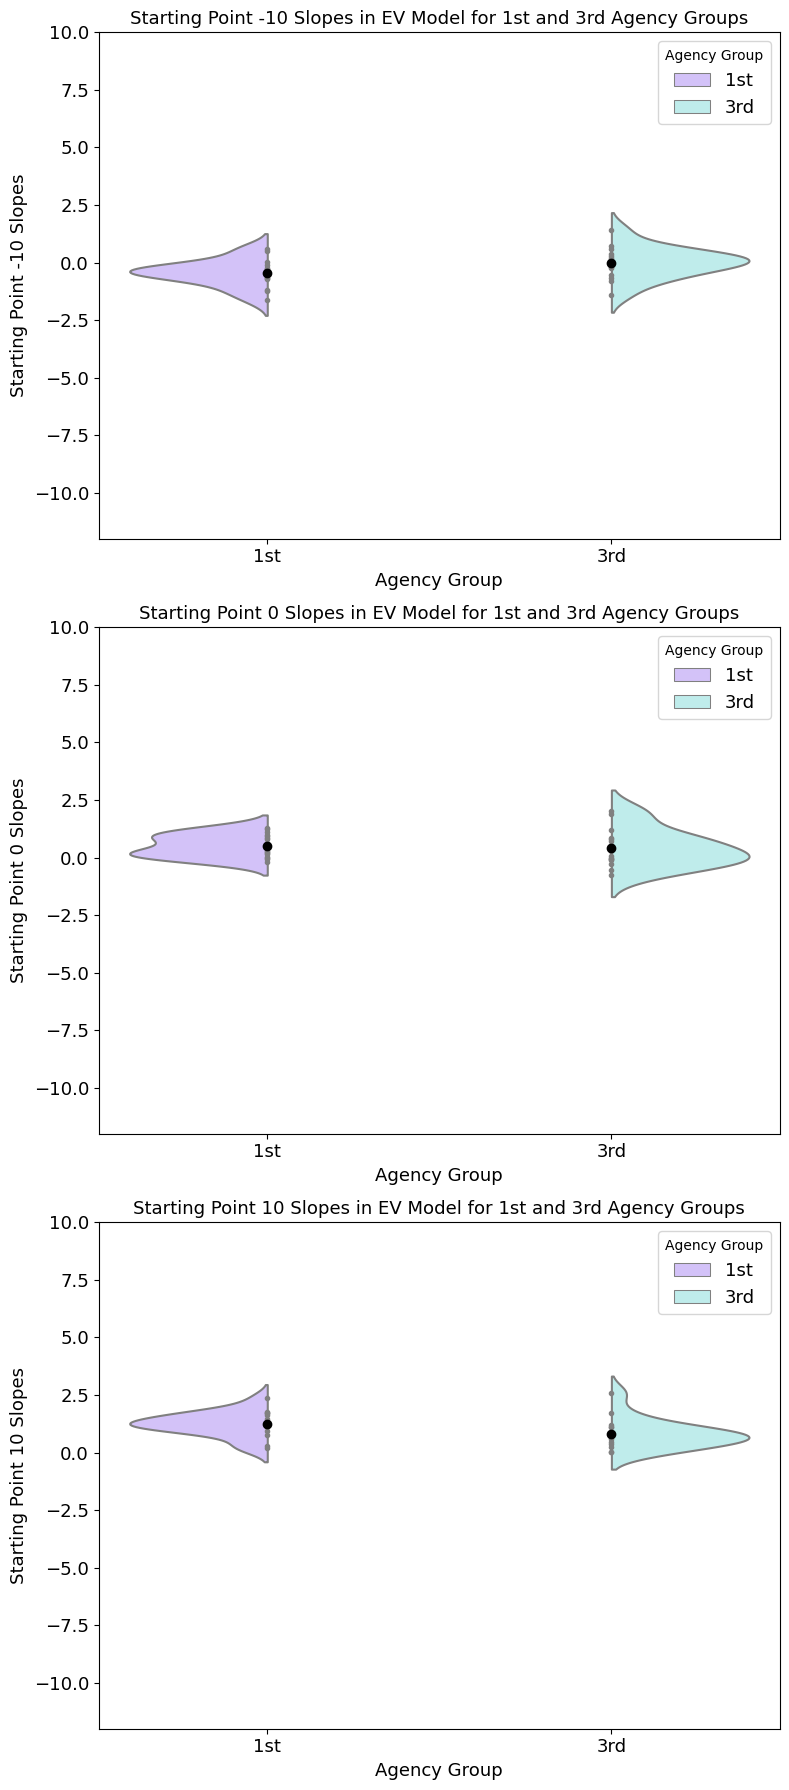

One-sample t-test for Starting Point -10 in 1st Agency Group: t-statistic=-3.2202624240757394, p-value=0.005345120461040137, corrected p-value=0.010022100864450257
One-sample t-test for Starting Point -10 in 3rd Agency Group: t-statistic=-0.028321582411547513, p-value=0.9777790437798526, corrected p-value=0.9777790437798526
One-sample t-test for Starting Point 0 in 1st Agency Group: t-statistic=4.3753238936073, p-value=0.0004707641565549394, corrected p-value=0.0011769103913873485
One-sample t-test for Starting Point 0 in 3rd Agency Group: t-statistic=2.013052393925993, p-value=0.06241628770298163, corrected p-value=0.08511311959497496
One-sample t-test for Starting Point 10 in 1st Agency Group: t-statistic=9.636353172662831, p-value=4.587555308273326e-08, corrected p-value=3.440666481204995e-07
One-sample t-test for Starting Point 10 in 3rd Agency Group: t-statistic=5.087323453093376, p-value=0.00013377890646021627, corrected p-value=0.0005016708992258111
Two-sample t-test for Startin

In [ ]:
#EV
create_violin_plots(
    starting_point_minus_10_slopes_1st_ev, starting_point_minus_10_slopes_3rd_ev,
    starting_point_0_slopes_1st_ev, starting_point_0_slopes_3rd_ev,
    starting_point_10_slopes_1st_ev, starting_point_10_slopes_3rd_ev, 'EV'
)

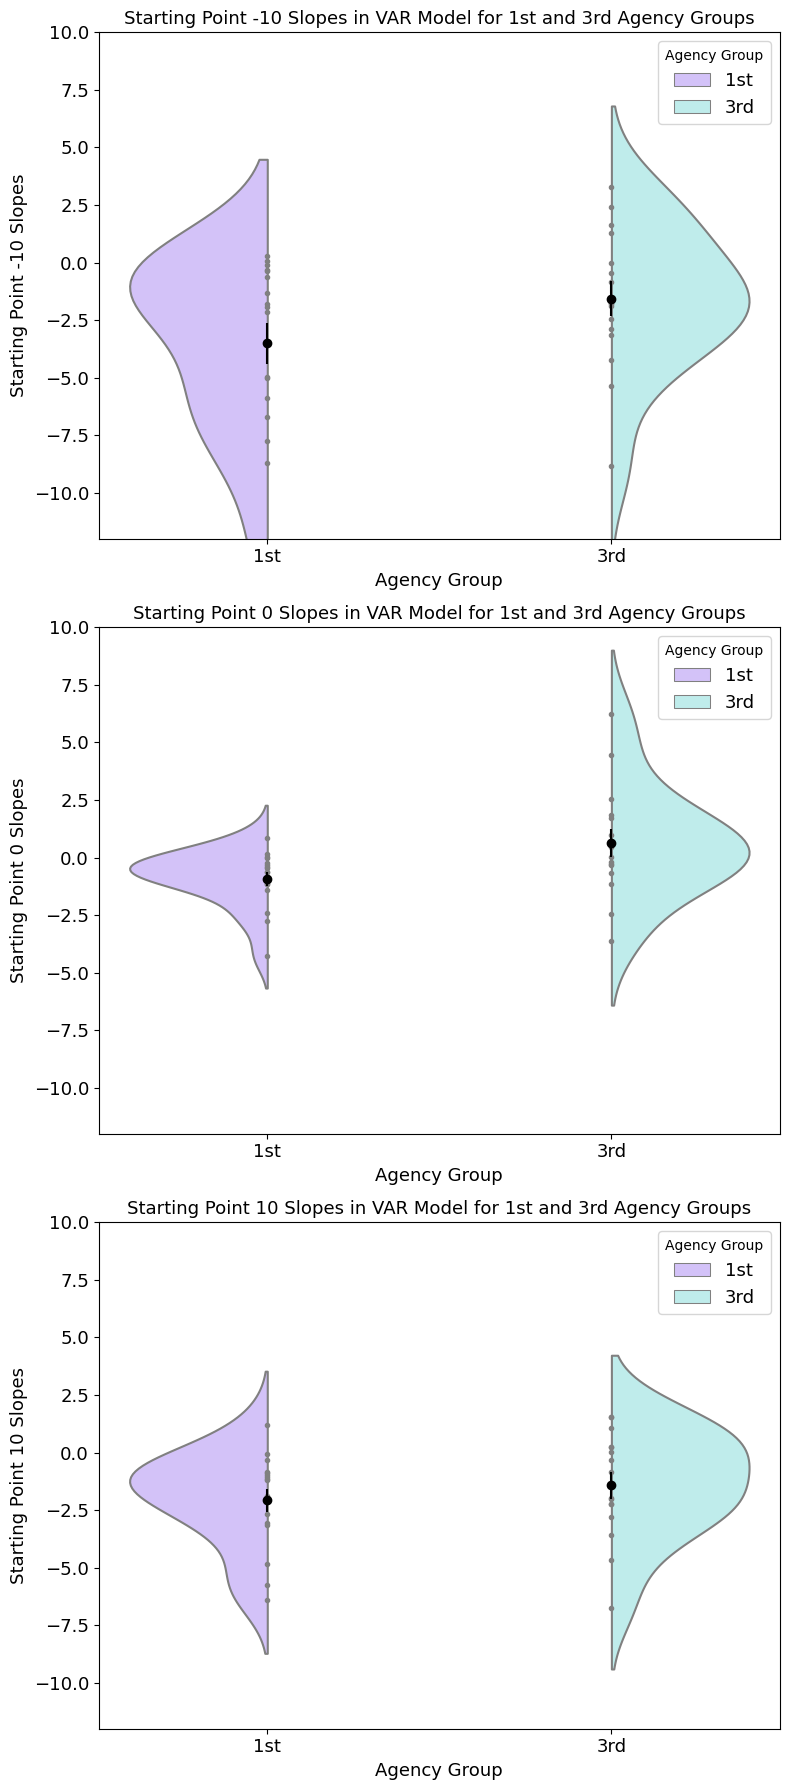

One-sample t-test for Starting Point -10 in 1st Agency Group: t-statistic=-3.898154673772737, p-value=0.0012787335824578031, corrected p-value=0.009590501868433524
One-sample t-test for Starting Point -10 in 3rd Agency Group: t-statistic=-2.0445464677011294, p-value=0.05886383618331235, corrected p-value=0.08829575427496852
One-sample t-test for Starting Point 0 in 1st Agency Group: t-statistic=-3.0630582981917676, p-value=0.007432986707642071, corrected p-value=0.03716493353821035
One-sample t-test for Starting Point 0 in 3rd Agency Group: t-statistic=1.057111308937411, p-value=0.30718921827074924, corrected p-value=0.35444909800471064
One-sample t-test for Starting Point 10 in 1st Agency Group: t-statistic=-4.166582203827383, p-value=0.0007276282715227693, corrected p-value=0.009590501868433524
One-sample t-test for Starting Point 10 in 3rd Agency Group: t-statistic=-2.4486230082054665, p-value=0.027114612913659526, corrected p-value=0.05810274195784184
Two-sample t-test for Starting

In [ ]:
#Var
create_violin_plots(
    starting_point_minus_10_slopes_1st_var, starting_point_minus_10_slopes_3rd_var,
    starting_point_0_slopes_1st_var, starting_point_0_slopes_3rd_var,
    starting_point_10_slopes_1st_var, starting_point_10_slopes_3rd_var, 'VAR'
)

In [ ]:

# Function to calculate effect size and required sample size
def power_analysis(data, mu_0=0, alpha=0.05, power=0.80):
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    # Effect size (Cohen's d)
    effect_size = (mean - mu_0) / std
    print(f"Effect size (Cohen's d): {effect_size:.2f}")

    # Create a power analysis object for one-sample t-test
    analysis = TTestPower()

    # Perform power analysis
    sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='two-sided')
    print(f'Required sample size: {sample_size:.2f}')

# Power analysis for starting_point_minus_10_slopes_1st
print("Starting Point -10 Slopes 1st Person:")
power_analysis(starting_point_minus_10_slopes_1st)

# Power analysis for starting_point_0_slopes_1st
print("\nStarting Point 0 Slopes 1st Person:")
power_analysis(starting_point_0_slopes_1st)

# Power analysis for starting_point_10_slopes_1st
print("\nStarting Point 10 Slopes 1st Person:")
power_analysis(starting_point_10_slopes_1st)

# Power analysis for starting_point_minus_10_slopes_3rd
print("\nStarting Point -10 Slopes 3rd Person:")
power_analysis(starting_point_minus_10_slopes_3rd)

# Power analysis for starting_point_0_slopes_3rd
print("\nStarting Point 0 Slopes 3rd Person:")
power_analysis(starting_point_0_slopes_3rd)

# Power analysis for starting_point_10_slopes_3rd
print("\nStarting Point 10 Slopes 3rd Person:")
power_analysis(starting_point_10_slopes_3rd)

Starting Point -10 Slopes 1st Person:
Effect size (Cohen's d): 0.42
Required sample size: 45.53

Starting Point 0 Slopes 1st Person:
Effect size (Cohen's d): -0.19
Required sample size: 221.08

Starting Point 10 Slopes 1st Person:
Effect size (Cohen's d): -1.09
Required sample size: 8.75

Starting Point -10 Slopes 3rd Person:
Effect size (Cohen's d): 0.13
Required sample size: 437.77

Starting Point 0 Slopes 3rd Person:
Effect size (Cohen's d): -0.49
Required sample size: 35.16

Starting Point 10 Slopes 3rd Person:
Effect size (Cohen's d): -0.50
Required sample size: 33.13


Agency Group
1st    0.167205
3rd   -0.313687
Name: Satisfaction, dtype: float64


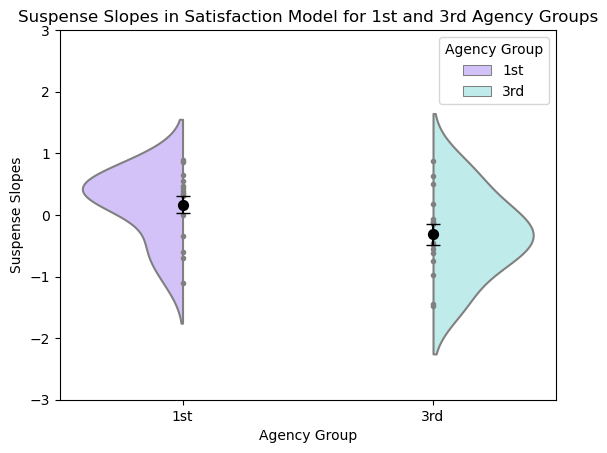

One-sample t-test for Satisfaction in 1st Agency Group: t-statistic=1.1664265937772316, p-value=0.26165288125026825, degrees of freedom=15
One-sample t-test for Satisfaction in 3rd Agency Group: t-statistic=-1.8551130771166089, p-value=0.08334021197548858, degrees of freedom=15
Two-sample t-test for Satisfaction between 1st and 3rd Agency Groups: t-statistic=2.1693255579089747, p-value=0.03811065473829966, degrees of freedom=30


In [ ]:
#Satisfaction only explained by suspense
# Create the DataFrame
df_sat_cond_2 = pd.DataFrame({
    'Satisfaction': satisfaction_slopes_cond_2_1st + satisfaction_slopes_cond_2_3rd,
    'Agency Group': ['1st'] * len(satisfaction_slopes_cond_2_1st) + ['3rd'] * len(satisfaction_slopes_cond_2_3rd)
})


# Define pastel color palette
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9]]

# Create the violin plot
sns.violinplot(x='Agency Group', y='Satisfaction', data=df_sat_cond_2, saturation=0.8, hue='Agency Group', inner='point', split=True, palette=colors)

# Calculate means
means = df_sat_cond_2.groupby('Agency Group')['Satisfaction'].mean()

print(means)

std_err = df_sat_cond_2.groupby('Agency Group')['Satisfaction'].std() / np.sqrt(df_sat_cond_2.groupby('Agency Group')['Satisfaction'].count())

# Plot mean points
plt.scatter(x=[0, 1], y=means.values, c="k", marker="o", s=50, label='Mean')

# Plot standard error bars
plt.errorbar(x=[0, 1], y=means.values, yerr=std_err.values, fmt='o', c='k', linestyle='None', capsize=5)


# Add title and labels
plt.title('Suspense Slopes in Satisfaction Model for 1st and 3rd Agency Groups')
plt.xlabel('Agency Group')
plt.ylabel('Suspense Slopes')
plt.ylim(-3, 3)

# Show the plot
plt.show()

# Perform one-sample t-test against zero for each variable
# Define the degrees of freedom calculation function
def degrees_of_freedom(n1, n2=None):
    if n2 is None:
        return n1 - 1
    return n1 + n2 - 2

for variable, df_var in {'Satisfaction': df_sat_cond_2, 'Satisfaction': df_sat_cond_2}.items():
    for group in ['1st', '3rd']:
        group_data = df_var[df_var['Agency Group'] == group][variable]
        t_stat, p_val = ttest_1samp(group_data, 0)
        df_group = degrees_of_freedom(len(group_data))
        print(f"One-sample t-test for {variable} in {group} Agency Group: t-statistic={t_stat}, p-value={p_val}, degrees of freedom={df_group}")

# Perform two-sample t-test between 1st and 3rd Agency Groups for each variable
for variable, df_var in {'Satisfaction': df_sat_cond_2, 'Satisfaction': df_sat_cond_2}.items():
    group_1st = df_var[df_var['Agency Group'] == '1st'][variable]
    group_3rd = df_var[df_var['Agency Group'] == '3rd'][variable]
    t_stat, p_val = ttest_ind(group_1st, group_3rd)
    df_groups = degrees_of_freedom(len(group_1st), len(group_3rd))
    print(f"Two-sample t-test for {variable} between 1st and 3rd Agency Groups: t-statistic={t_stat}, p-value={p_val}, degrees of freedom={df_groups}")

In [ ]:
#Make power test 

# Power analysis for starting_point_10_slopes_3rd
print("\nSatisfaction slopes conditions 2, 1st Person:")
power_analysis(satisfaction_slopes_cond_2_1st)

# Power analysis for starting_point_10_slopes_3rd
print("\nSatisfaction slopes conditions 2, 3rd Person:")
power_analysis(satisfaction_slopes_cond_2_3rd)


Satisfaction slopes conditions 2, 1st Person:
Effect size (Cohen's d): 0.29
Required sample size: 94.24

Satisfaction slopes conditions 2, 3rd Person:
Effect size (Cohen's d): -0.46
Required sample size: 38.46


In [ ]:
satisfaction_slopes_cond_2_minus_10_1st
def get_all_participant_second_param(data_dictionary)->List[float]:
    data_list:List[float] = []
    for participant in data_dictionary.keys():
        param_list:List[float] = data_dictionary[participant]["params"]
        data_list.append(param_list[1])
    return data_list

Agency Group
1st    0.921279
3rd   -0.052487
Name: Starting Point -10, dtype: float64
Agency Group
1st    0.205360
3rd    1.031735
Name: Starting Point 0, dtype: float64
Agency Group
1st    0.053154
3rd   -1.203086
Name: Starting Point 10, dtype: float64


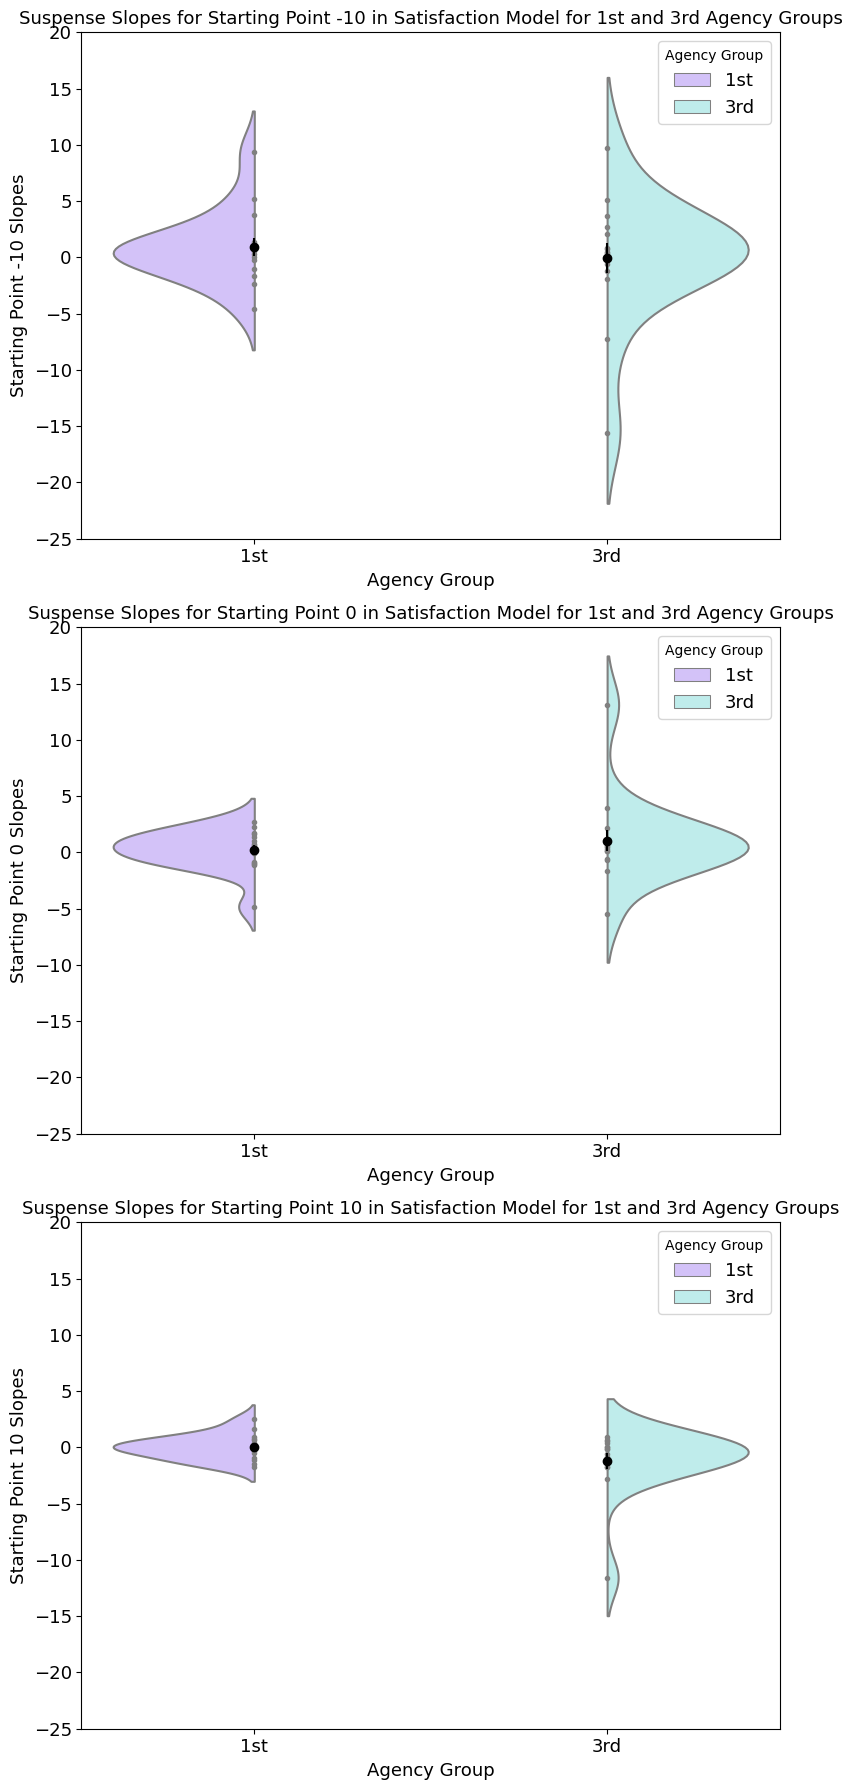

In [ ]:
# Create DataFrames for each variable
satisfaction_slopes_cond_2_minus_10_1st_list = get_all_participant_second_param(satisfaction_slopes_cond_2_minus_10_1st)
satisfaction_slopes_cond_2_minus_10_3rd_list = get_all_participant_second_param(satisfaction_slopes_cond_2_minus_10_3rd)
satisfaction_slopes_cond_2_0_1st_list = get_all_participant_second_param(satisfaction_slopes_cond_2_0_1st)
satisfaction_slopes_cond_2_0_3rd_list = get_all_participant_second_param(satisfaction_slopes_cond_2_0_3rd)
satisfaction_slopes_cond_2_10_1st_list = get_all_participant_second_param(satisfaction_slopes_cond_2_10_1st)
satisfaction_slopes_cond_2_10_3rd_list = get_all_participant_second_param(satisfaction_slopes_cond_2_10_3rd)

df_sat_starting_point_minus_10 = pd.DataFrame({
    'Starting Point -10': satisfaction_slopes_cond_2_minus_10_1st_list + satisfaction_slopes_cond_2_minus_10_3rd_list,
    'Agency Group': ['1st'] * len(satisfaction_slopes_cond_2_minus_10_1st_list) + ['3rd'] * len(satisfaction_slopes_cond_2_minus_10_3rd_list)
})

df_sat_starting_point_0 = pd.DataFrame({
    'Starting Point 0': satisfaction_slopes_cond_2_0_1st_list + satisfaction_slopes_cond_2_0_3rd_list,
    'Agency Group': ['1st'] * len(satisfaction_slopes_cond_2_0_1st_list) + ['3rd'] * len(satisfaction_slopes_cond_2_0_3rd_list)
})


df_sat_starting_point_10 = pd.DataFrame({
    'Starting Point 10': satisfaction_slopes_cond_2_10_1st_list + satisfaction_slopes_cond_2_10_3rd_list,
    'Agency Group': ['1st'] * len(satisfaction_slopes_cond_2_10_1st_list) + ['3rd'] * len(satisfaction_slopes_cond_2_10_3rd_list)
})



# Define pastel color palette
pastel_palette = sns.color_palette("pastel")
colors = [pastel_palette[4], pastel_palette[9], pastel_palette[7]]

# Create the violin plots for all variables in one graph
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Plot each variable
for ax, df, variable, ylabel in zip(axes, [df_sat_starting_point_minus_10, df_sat_starting_point_0, df_sat_starting_point_10], ['Starting Point -10', 'Starting Point 0', 'Starting Point 10'], ['Starting Point -10 Slopes', 'Starting Point 0 Slopes', 'Starting Point 10 Slopes']):
    sns.violinplot(x='Agency Group', y=variable, data=df, saturation=0.8, hue='Agency Group', inner='point', split=True, palette=colors, ax=ax)
    ax.set_title(f'Suspense Slopes for {variable} in Satisfaction Model for 1st and 3rd Agency Groups', fontsize=13)
    ax.set_xlabel('Agency Group', fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_ylim(-25, 20)  # Set y-axis limit
    ax.legend(title='Agency Group', fontsize=13)
    
    # Calculate means and standard errors
    means = df.groupby('Agency Group')[variable].mean()
    print(means)
    std_err = df.groupby('Agency Group')[variable].std() / np.sqrt(df.groupby('Agency Group')[variable].count())
    
    # Plot mean points
    for i, group in enumerate(['1st', '3rd']):
        ax.errorbar(x=i, y=means[group], yerr=std_err[group], fmt='o', color='black', label=f'Mean {group}')


        
        # Set tick label font size
        ax.tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.show()

In [ ]:
# Perform one-sample t-test against zero for each list
lists = {
    'satisfaction_slopes_cond_2_minus_10_1st_list': satisfaction_slopes_cond_2_minus_10_1st_list,
    'satisfaction_slopes_cond_2_minus_10_3rd_list': satisfaction_slopes_cond_2_minus_10_3rd_list,
    'satisfaction_slopes_cond_2_0_1st_list': satisfaction_slopes_cond_2_0_1st_list,
    'satisfaction_slopes_cond_2_0_3rd_list': satisfaction_slopes_cond_2_0_3rd_list,
    'satisfaction_slopes_cond_2_10_1st_list': satisfaction_slopes_cond_2_10_1st_list,
    'satisfaction_slopes_cond_2_10_3rd_list': satisfaction_slopes_cond_2_10_3rd_list
}

for name, data in lists.items():
    t_stat, p_val = ttest_1samp(data, 0)
    print(f"One-sample t-test for {name}: t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

# Perform two-sample t-tests between 1st and 3rd Agency Groups
comparison_pairs = [
    ('satisfaction_slopes_cond_2_minus_10_1st_list', 'satisfaction_slopes_cond_2_minus_10_3rd_list'),
    ('satisfaction_slopes_cond_2_0_1st_list', 'satisfaction_slopes_cond_2_0_3rd_list'),
    ('satisfaction_slopes_cond_2_10_1st_list', 'satisfaction_slopes_cond_2_10_3rd_list')
]

for list1, list2 in comparison_pairs:
    data1 = lists[list1]
    data2 = lists[list2]
    t_stat, p_val = ttest_ind(data1, data2)
    print(f"Two-sample t-test between {list1} and {list2}: t-statistic={t_stat:.4f}, p-value={p_val:.4f}")

One-sample t-test for satisfaction_slopes_cond_2_minus_10_1st_list: t-statistic=1.1611, p-value=0.2638
One-sample t-test for satisfaction_slopes_cond_2_minus_10_3rd_list: t-statistic=-0.0384, p-value=0.9699
One-sample t-test for satisfaction_slopes_cond_2_0_1st_list: t-statistic=0.4550, p-value=0.6556
One-sample t-test for satisfaction_slopes_cond_2_0_3rd_list: t-statistic=1.0946, p-value=0.2909
One-sample t-test for satisfaction_slopes_cond_2_10_1st_list: t-statistic=0.1913, p-value=0.8509
One-sample t-test for satisfaction_slopes_cond_2_10_3rd_list: t-statistic=-1.6328, p-value=0.1233
Two-sample t-test between satisfaction_slopes_cond_2_minus_10_1st_list and satisfaction_slopes_cond_2_minus_10_3rd_list: t-statistic=0.6164, p-value=0.5423
Two-sample t-test between satisfaction_slopes_cond_2_0_1st_list and satisfaction_slopes_cond_2_0_3rd_list: t-statistic=-0.7908, p-value=0.4353
Two-sample t-test between satisfaction_slopes_cond_2_10_1st_list and satisfaction_slopes_cond_2_10_3rd_list

In [ ]:
#Make power test 

# Power analysis for starting_point_10_slopes_1st
print("\nSatisfaction slopes conditions 2 -10, 1st Person:")
power_analysis(satisfaction_slopes_cond_2_minus_10_1st_list)

print("\nSatisfaction slopes conditions 2 0, 1st Person:")
power_analysis(satisfaction_slopes_cond_2_0_1st_list)

print("\nSatisfaction slopes conditions 2 10, 1st Person:")
power_analysis(satisfaction_slopes_cond_2_10_1st_list)




# Power analysis for starting_point_10_slopes_3rd
print("\nSatisfaction slopes conditions 2 -10, 3rd Person:")
power_analysis(satisfaction_slopes_cond_2_minus_10_3rd_list)

print("\nSatisfaction slopes conditions 2 0, 3rd Person:")
power_analysis(satisfaction_slopes_cond_2_0_3rd_list)

print("\nSatisfaction slopes conditions 2 10, 3rd Person:")
power_analysis(satisfaction_slopes_cond_2_10_3rd_list)




Satisfaction slopes conditions 2 -10, 1st Person:
Effect size (Cohen's d): 0.29
Required sample size: 95.10

Satisfaction slopes conditions 2 0, 1st Person:
Effect size (Cohen's d): 0.11
Required sample size: 608.58

Satisfaction slopes conditions 2 10, 1st Person:
Effect size (Cohen's d): 0.05
Required sample size: 3434.80

Satisfaction slopes conditions 2 -10, 3rd Person:
Effect size (Cohen's d): -0.01
Required sample size: 85068.87

Satisfaction slopes conditions 2 0, 3rd Person:
Effect size (Cohen's d): 0.27
Required sample size: 106.74

Satisfaction slopes conditions 2 10, 3rd Person:
Effect size (Cohen's d): -0.41
Required sample size: 49.06
